<a href="https://colab.research.google.com/github/saleha135/machine_learning1/blob/master/doc_id_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPU Status

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6485309266513876110
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1659540297720723697
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4842751883358656366
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14800692839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2442324758757440185
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


# Backend Availabel Gpus

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

# Load Data

In [0]:
!mkdir data

In [4]:
!unzip -d data data.zip

Archive:  data.zip
   creating: data/data/
   creating: data/data/aadhar_card/
  inflating: data/data/aadhar_card/1.jpg  
  inflating: data/data/aadhar_card/2.jpg  
  inflating: data/data/aadhar_card/3.jpg  
  inflating: data/data/aadhar_card/4.jpg  
  inflating: data/data/aadhar_card/5.jpg  
  inflating: data/data/aadhar_card/8.jpg  
  inflating: data/data/aadhar_card/10.jpg  
  inflating: data/data/aadhar_card/12.jpg  
  inflating: data/data/aadhar_card/14.jpg  
  inflating: data/data/aadhar_card/15.jpg  
  inflating: data/data/aadhar_card/16.jpg  
  inflating: data/data/aadhar_card/19.jpg  
  inflating: data/data/aadhar_card/21.jpg  
  inflating: data/data/aadhar_card/23.jpg  
  inflating: data/data/aadhar_card/26.jpg  
  inflating: data/data/aadhar_card/27.jpg  
  inflating: data/data/aadhar_card/29.jpg  
  inflating: data/data/aadhar_card/31.jpg  
  inflating: data/data/aadhar_card/36.jpg  
  inflating: data/data/aadhar_card/38.jpg  
  inflating: data/data/aadhar_card/39.jpg  
  i

In [0]:
import matplotlib
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

In [6]:
imagp=os.listdir("data/data/")
print(imagp)

['aadhar_card', 'pan_card', 'passport']


In [0]:
imagePaths=[]
for i in range(len(imagp)):
  imagePaths.append(sorted(list(paths.list_images('data/data/'+imagp[i]))))
random.seed(42)
random.shuffle(imagePaths)

In [0]:
data=[]
labels=[]
for j in range(len(imagp)):
  for i in imagePaths[j]:
    image = cv2.imread(i)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    # extract the class label from the image path and update the
    # labels list
    label = i.split(os.path.sep)[-2]
    if label == "pan_card":
      label = 0
    elif label == "passport":
      label = 1
    elif label == "aadhar_card":
      label = 2
    else:
      pass
     
    labels.append(label)

In [11]:
labels[0:1]

[0]

In [0]:
labels_data = to_categorical(np.asarray(labels),num_classes=3)

In [14]:
print(labels_data[0])
print(labels_data.shape)
print(data[0].shape)

[1. 0. 0.]
(208, 3)
(28, 28, 3)


In [0]:
data = np.array(data,dtype="float")/225.0

In [0]:
x_train,x_test,y_train,y_test = train_test_split(data,labels_data,test_size=0.25,random_state=42)

In [22]:
print(x_train.shape)
print(y_train.shape)

(156, 28, 28, 3)
(156, 3)


# DATA *AUGMANTATIO*

In [0]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

# Class LeNet

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [0]:
class LeNet:
  def build(width,height,depth,classes):
    model = Sequential()
    inputshape = (height,width,depth)
    
    if K.image_data_format()== "channel_first":
      inputshape = (height,width,depth)
    # first set of CONV => RELU => POOL layers
    model.add(Conv2D(20,(5,5),padding="valid",input_shape=inputshape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    # second set of CONV => RELU => POOL layers
    model.add(Conv2D(50,(5,5),padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    
    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    
    
    return model

#  Model

In [34]:
EPOCHS = 100
BS = 32
print("Compiling Model")
model = LeNet.build(width=28, height=28, depth=3, classes=3)
model.summary()
opt = Adam(lr=0.001,decay=0.001/EPOCHS)
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
print("Traing Network")
H = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),validation_data=(x_test, y_test), steps_per_epoch = (len(x_train) // BS),
                        epochs=EPOCHS, verbose=1)


Compiling Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 20)        1520      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
activation_6 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0    

# Prediction

In [98]:

# load the image
image = cv2.imread(imagePaths[1][2])
orig = image.copy()
 
# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predict_label(image)

aadhar_card


In [100]:
# load the image
image = cv2.imread(imagePaths[1][2])
orig = image.copy()
 
# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predict_label(image)

aadhar_card


In [97]:
# load the image
image = cv2.imread(imagePaths[0][10])
orig = image.copy()
 
# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predict_label(image)

pan_card


In [0]:
def predict_label(image_data):
  image = cv2.imread(image_data)
  orig = image.copy()
  # pre-process the image for classification
  image = cv2.resize(image, (28, 28))
  image = image.astype("float") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  y_pred=model.predict(image)[0]
  y_pred_label=np.argmax(y_pred)
  if y_pred_label == 0:
    print("pan_card")
  elif y_pred_label == 1:
    print("passport")
  elif y_pred_label == 2:
    print("aadhar_card")
  else:
    pass

In [103]:
image=imagePaths[2][0]
predict_label(image)

passport


In [54]:
y_pred[0]

array([9.96532559e-01, 3.36249080e-03, 1.04949686e-04], dtype=float32)

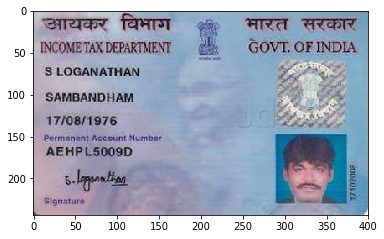

In [95]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread(imagePaths[0][10])
imgplot = plt.imshow(img)

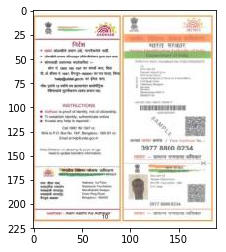

In [99]:
img=mpimg.imread(imagePaths[1][10])
imgplot = plt.imshow(img)

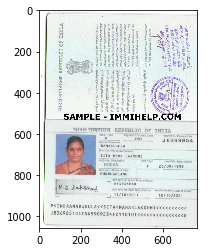

In [49]:
img=mpimg.imread(imagePaths[2][0])
imgplot = plt.imshow(img)

In [0]:
# load the image
image = cv2.imread(imagePaths[2][0])
orig = image.copy()
 
# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [53]:
model.predict(image)

array([[5.2182510e-04, 9.9867225e-01, 8.0593704e-04]], dtype=float32)